In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("D:\MachineLearning(FST)\Hackathon/data.csv")

In [3]:
data

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108045,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


In [4]:
#size of dataset
data.shape

(2227, 3)

In [5]:
#info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [6]:
#checking null values 
data.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [7]:
#describing dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,2222.0,-4.818766,7.493991e+01,-134.369160,-71.757030,-9.836555,59.813962,1.345087e+02
x2,2224.0,89476.258941,2.983323e+06,-134.876132,-80.129829,-1.046151,63.890863,1.000000e+08
y,2227.0,0.442299,4.967710e-01,0.000000,0.000000,0.000000,1.000000,1.000000e+00


In [8]:
#filling null values with mean value
data["x1"].fillna(data["x1"].mean(), inplace = True)

In [9]:
data.isnull().sum()

x1    0
x2    3
y     0
dtype: int64

In [10]:
data["x2"].fillna(data["x2"].mean(), inplace = True)

In [11]:
data.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

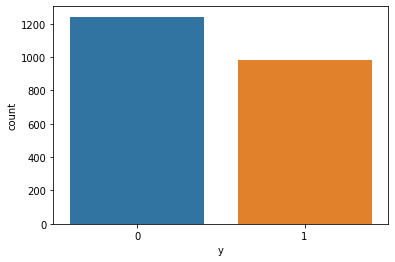

In [12]:
#countplot of target variable (y)
sns.countplot(data["y"])

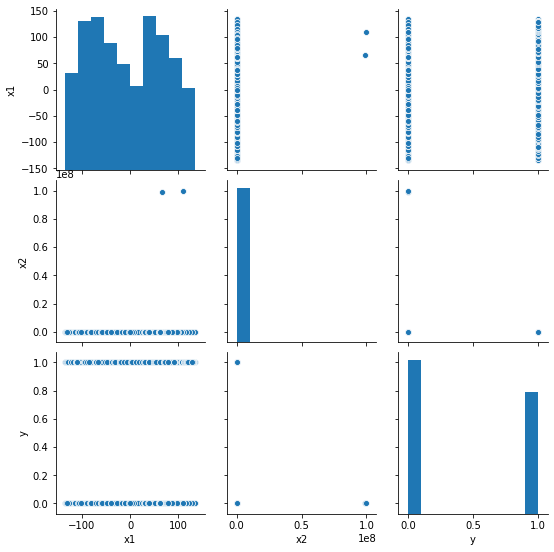

In [13]:
#nature of distribution of dataset
sns.pairplot(data)

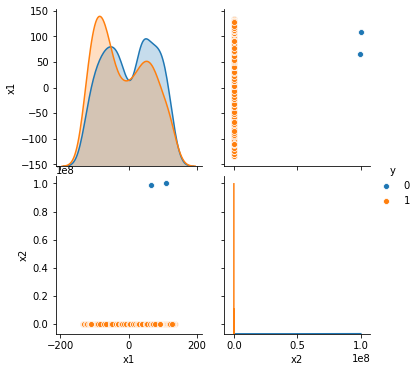

In [14]:
sns.pairplot(data,hue="y")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000251F48782C8>,
      dtype=object)

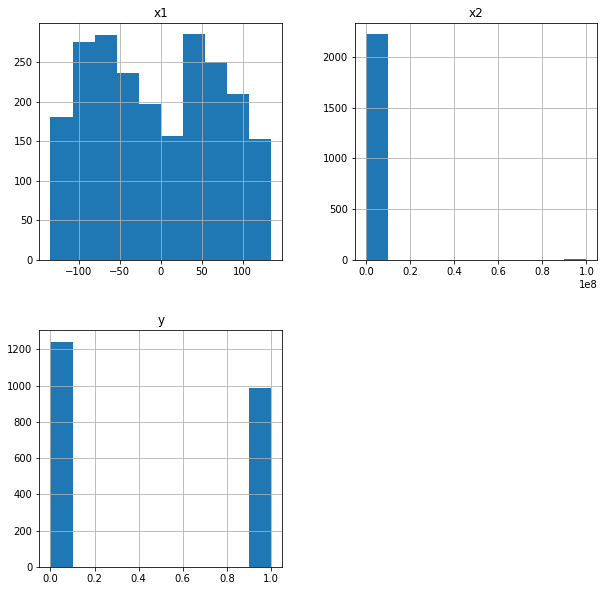

In [15]:
#histogram 
data.hist(figsize=(10,10))

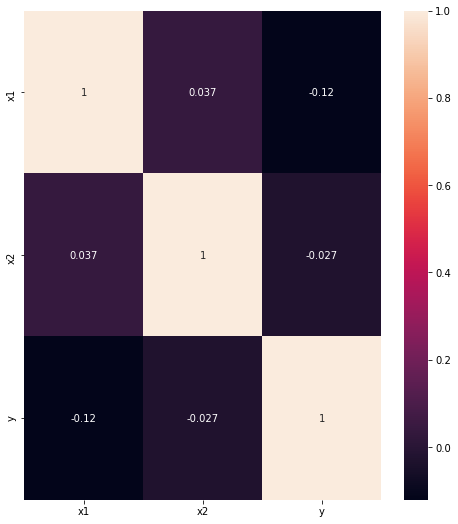

In [16]:
#correlation 
f, ax = plt.subplots(figsize=(8,9))
sns.heatmap(data.corr(),annot=True)

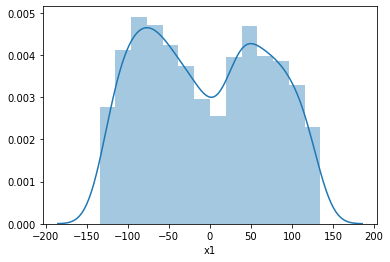

In [17]:
#distplot
sns.distplot(data["x1"])

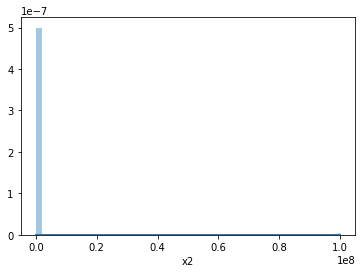

In [18]:
sns.distplot(data["x2"])

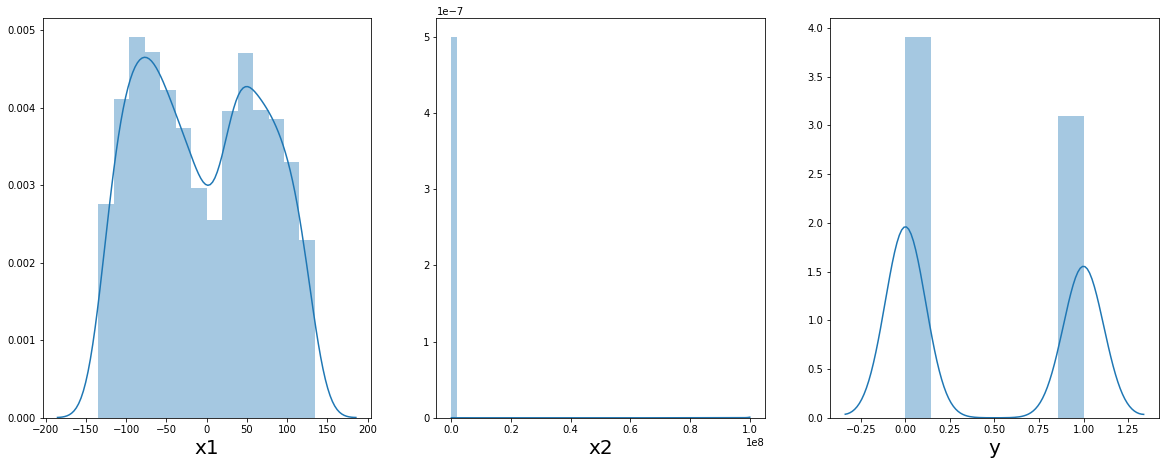

In [19]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=3 :     
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

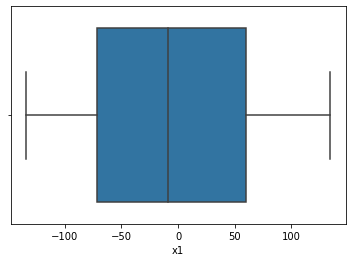

In [20]:
#for checking outliers
sns.boxplot(data["x1"])

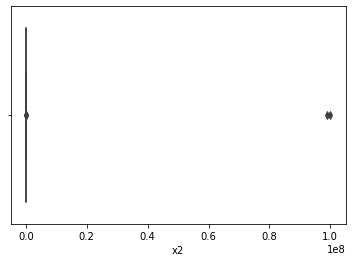

In [21]:
sns.boxplot(data["x2"])

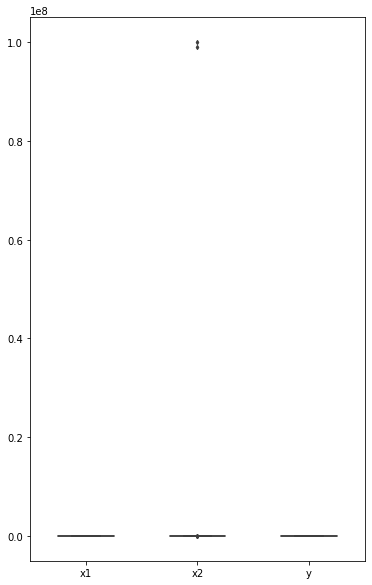

In [24]:
fig, ax = plt.subplots(figsize=(6,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [25]:
q = data['x2'].quantile(0.99)
# we are removing the top 1% data from the x2 column
data_cleaned = data[data['x2']<q]

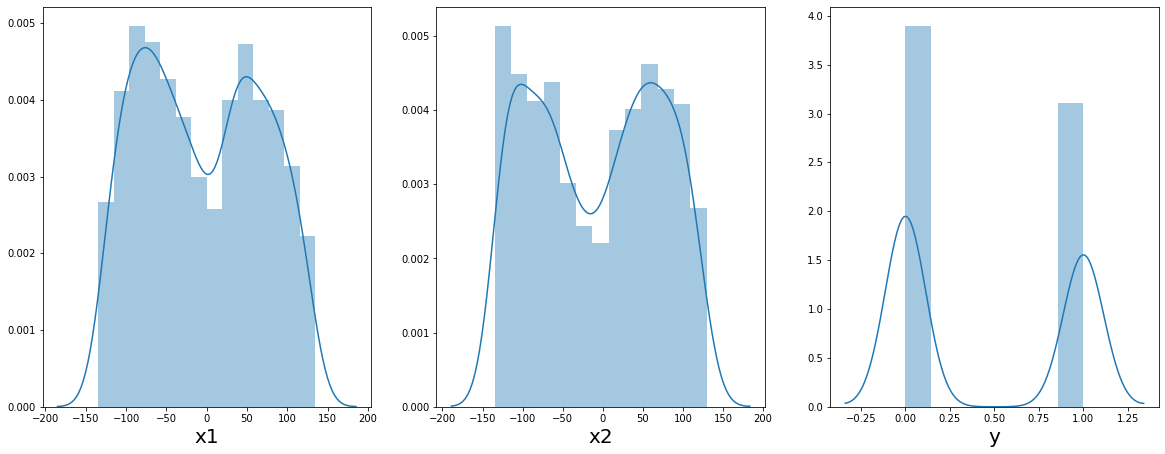

In [26]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=3 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

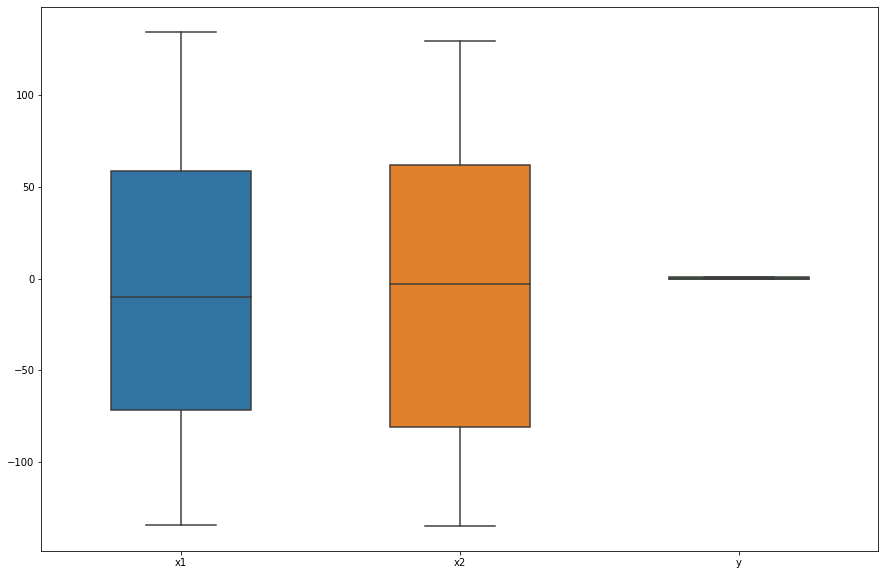

In [27]:
#after treaing outliers
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_cleaned, width= 0.5,ax=ax,  fliersize=3)

In [28]:
#removed outliers
data_cleaned

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108045,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1
...,...,...,...
2221,88.129639,107.514918,0
2222,98.714112,89.643117,0
2223,96.633331,91.000000,0
2224,85.673940,103.839270,0


In [29]:
X = data_cleaned.drop(columns = ['y'])
y = data_cleaned['y']

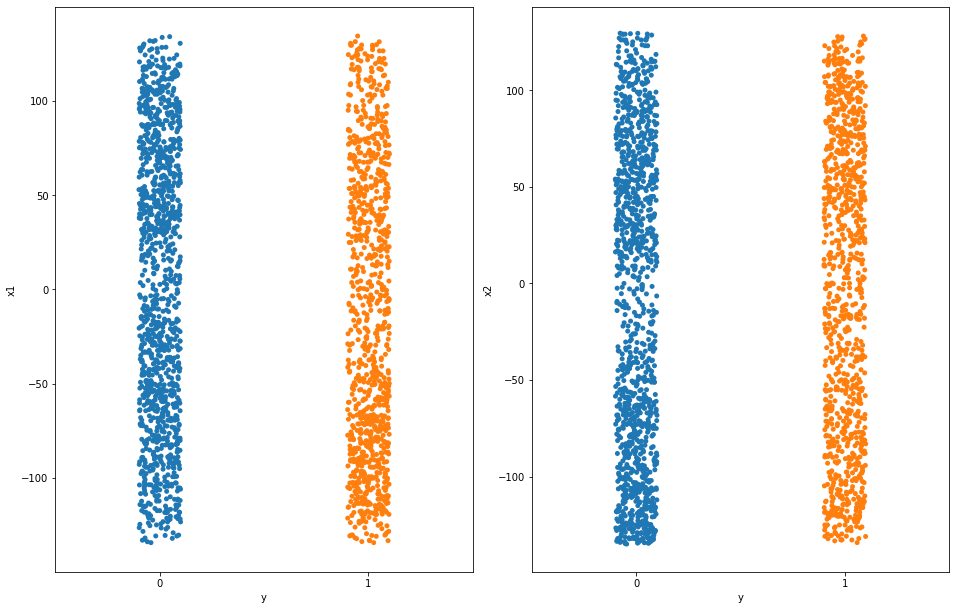

In [30]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=3 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [31]:
#scaling dataset
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [32]:
X_scaled

array([[-1.53503138,  1.55104625],
       [-1.28956659,  1.33349378],
       [-1.68172968,  1.44705835],
       ...,
       [ 1.3688234 ,  1.24788726],
       [ 1.22148785,  1.4100681 ],
       [ 1.13121187,  1.09132296]])

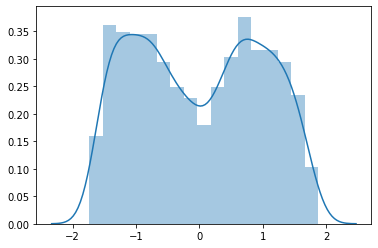

In [33]:
#distribution of dataset after scaling
sns.distplot(X_scaled)

In [34]:
#train and split dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 0)

## Model 1
### Logistic Regression

In [35]:
from sklearn.linear_model  import  LogisticRegression

In [36]:
#import Linear Regression Algorithm
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)

#Printing the slope(Intercept),Coefficient
print(lr.intercept_)
print(lr.coef_)

[-0.23064721]
[[-0.00323072  0.00205713]]


In [37]:
#fitting model
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
y_pred = lr.predict(X_test)

In [39]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [40]:
model_score = lr.score(X_test,y_test)
model_score

0.7531760435571688

In [41]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score , classification_report 

In [42]:
metrics.confusion_matrix(y_test,y_pred)

array([[311,   0],
       [136, 104]], dtype=int64)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       311
           1       1.00      0.43      0.60       240

    accuracy                           0.75       551
   macro avg       0.85      0.72      0.71       551
weighted avg       0.83      0.75      0.73       551



In [44]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))
print('\n')
print(accuracy_score(y_test,y_pred))

[[311   0]
 [136 104]]


              precision    recall  f1-score   support

           0       0.70      1.00      0.82       311
           1       1.00      0.43      0.60       240

    accuracy                           0.75       551
   macro avg       0.85      0.72      0.71       551
weighted avg       0.83      0.75      0.73       551



0.7531760435571688


## In Logistic Regression ,the accuracy of model score is 0.75 So our model gives best accuracy 0.75 %

## Model 2 
## Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [47]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
y_predict = dt.predict(X_test)
y_predict

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,

In [49]:
model_score2 = dt.score(X_test,y_test)
model_score2

0.9364791288566243

In [50]:
print(confusion_matrix(y_test,y_predict))
print('\n')
print(classification_report(y_test,y_predict))
print('\n')
print(accuracy_score(y_test,y_predict))

[[288  23]
 [ 12 228]]


              precision    recall  f1-score   support

           0       0.96      0.93      0.94       311
           1       0.91      0.95      0.93       240

    accuracy                           0.94       551
   macro avg       0.93      0.94      0.94       551
weighted avg       0.94      0.94      0.94       551



0.9364791288566243


In [51]:
from sklearn.model_selection import cross_val_score 
print(cross_val_score(dt,X,y,cv=50,scoring='accuracy').mean())

0.9177474747474748


In [52]:
#With help of hyperparametertunning
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import  export_graphviz

In [53]:
param_dict = {
    "criterion" : ["gini","entropy"],
    "max_depth" : range(2,20,1),
    "min_samples_split"  : range(2,10,1),
    "min_samples_leaf" : range(1,10,1)
}

In [54]:
grid = GridSearchCV(dt,param_grid=param_dict,cv=5,verbose=1,n_jobs=-1)

In [55]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 4492 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 12492 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 12960 out of 12960 | elapsed:   34.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [56]:
grid.score(X_test,y_test)

0.9455535390199638

In [57]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_leaf': 6,
 'min_samples_split': 3}

In [58]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [59]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 14, min_samples_leaf = 6, min_samples_split = 7)

In [60]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=14, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [61]:
y_predict = dt.predict(X_test)
y_predict

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,

In [62]:
dt.score(X_test,y_test)

0.9491833030852994

In [63]:
print(confusion_matrix(y_test,y_predict))
print('\n')
print(classification_report(y_test,y_predict))
print('\n')
print(accuracy_score(y_test,y_predict))

[[292  19]
 [  9 231]]


              precision    recall  f1-score   support

           0       0.97      0.94      0.95       311
           1       0.92      0.96      0.94       240

    accuracy                           0.95       551
   macro avg       0.95      0.95      0.95       551
weighted avg       0.95      0.95      0.95       551



0.9491833030852994


### Great!! Our test score has improved after using Gridsearch(Hyperparametertunning).
### So the Model Accuracy is 0.93 with the help of Decision Tree Classification and with the help of hyperparameter tunning the model accuracy is 0.94 which is slightly higher than normal decision tree model.
### So Our model gives best accuracy is 0.94 %

## Model 3
### SVM with Linear Kernel

In [64]:
from sklearn import svm

In [67]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [68]:
y_predict = svclassifier.predict(X_test)

In [69]:
y_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [70]:
model_score3 = svclassifier.score(X_test,y_test)
model_score3

0.7477313974591652

In [71]:
print(confusion_matrix(y_test,y_predict))
print('\n')
print(classification_report(y_test,y_predict))
print('\n')
print(accuracy_score(y_test,y_predict))

[[311   0]
 [139 101]]


              precision    recall  f1-score   support

           0       0.69      1.00      0.82       311
           1       1.00      0.42      0.59       240

    accuracy                           0.75       551
   macro avg       0.85      0.71      0.70       551
weighted avg       0.83      0.75      0.72       551



0.7477313974591652


### In Support Vector Machine with Linear Kernel  ,the accuracy of model score is 0.74 So our model gives best accuracy 0.74 %

## Model 4
### SVM with RBF Kernel

In [73]:
from sklearn.svm import SVC
svclassifier2 = SVC(kernel='rbf')
svclassifier2.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [74]:
y_predict = svclassifier2.predict(X_test)

In [75]:
y_predict

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,

In [76]:
model_score4 = svclassifier2.score(X_test,y_test)
model_score4

0.9618874773139746

In [77]:
print(confusion_matrix(y_test,y_predict))
print('\n')
print(classification_report(y_test,y_predict))
print('\n')
print(accuracy_score(y_test,y_predict))

[[295  16]
 [  5 235]]


              precision    recall  f1-score   support

           0       0.98      0.95      0.97       311
           1       0.94      0.98      0.96       240

    accuracy                           0.96       551
   macro avg       0.96      0.96      0.96       551
weighted avg       0.96      0.96      0.96       551



0.9618874773139746


### In Support Vector Machine with RBF Kernel ,the accuracy of model score is 0.96 So our model gives best accuracy 0.96 %

## Model 5
### knn

In [79]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

In [80]:
knn = KNeighborsClassifier(n_neighbors=1)

In [81]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [82]:
y_pred = knn.predict(X_test)

In [83]:
y_pred

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,

In [84]:
model_score5 = knn.score(X_test,y_test)
model_score5

0.925589836660617

In [85]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))
print('\n')
print(accuracy_score(y_test,y_pred))

[[285  26]
 [ 15 225]]


              precision    recall  f1-score   support

           0       0.95      0.92      0.93       311
           1       0.90      0.94      0.92       240

    accuracy                           0.93       551
   macro avg       0.92      0.93      0.92       551
weighted avg       0.93      0.93      0.93       551



0.925589836660617


In [86]:
score = []
for i in range(1,100):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    score.append(accuracy_score(knn.predict(X_test),y_test, normalize=True))

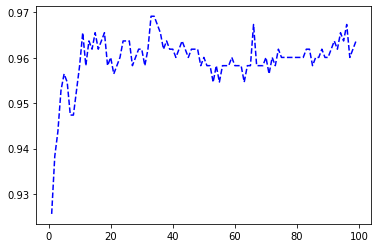

In [87]:
plt.plot(range(1,100),score,color='blue', linestyle='dashed')

In [88]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

WITH K=1


[[285  26]
 [ 15 225]]


              precision    recall  f1-score   support

           0       0.95      0.92      0.93       311
           1       0.90      0.94      0.92       240

    accuracy                           0.93       551
   macro avg       0.92      0.93      0.92       551
weighted avg       0.93      0.93      0.93       551



0.925589836660617


In [89]:
# NOW WITH K=11
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=11')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

WITH K=11


[[298  13]
 [  6 234]]


              precision    recall  f1-score   support

           0       0.98      0.96      0.97       311
           1       0.95      0.97      0.96       240

    accuracy                           0.97       551
   macro avg       0.96      0.97      0.97       551
weighted avg       0.97      0.97      0.97       551



0.9655172413793104


In [90]:
# NOW WITH K=33
knn = KNeighborsClassifier(n_neighbors=33)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=33')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

WITH K=33


[[298  13]
 [  4 236]]


              precision    recall  f1-score   support

           0       0.99      0.96      0.97       311
           1       0.95      0.98      0.97       240

    accuracy                           0.97       551
   macro avg       0.97      0.97      0.97       551
weighted avg       0.97      0.97      0.97       551



0.969147005444646


### In knn - 
### If we assign k value equals to 1 , then we get accuracy on test data which is around 0.92
### As we assign k value euals to 23 , then we get higher accuracy before last value of k value accuracy . i.e 0.96
### As we assign k value euals to 33 , then we get higher accuracy before last value of k value accuracy . i.e 0.96 closely to 0.97

------------------------------------------------------------------------------------

# Inference :- 

## 1. Logistic Regression = 0.75 %
## 2. Decision Tree with hyperparameter tunning = 0.94 %
## 3. SVM with Linear Kernel = 0.74 %
## 4. SVM with RBF Kernel = 0.96 %
## 5. Knn = 0.96 closely to 0.97 %
 
## So KNN algorithm performs well as compared to others.Also SVM with RBF kernel performs well. 
## So knn is a non parametric method for classification and regression.